      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
(200, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   

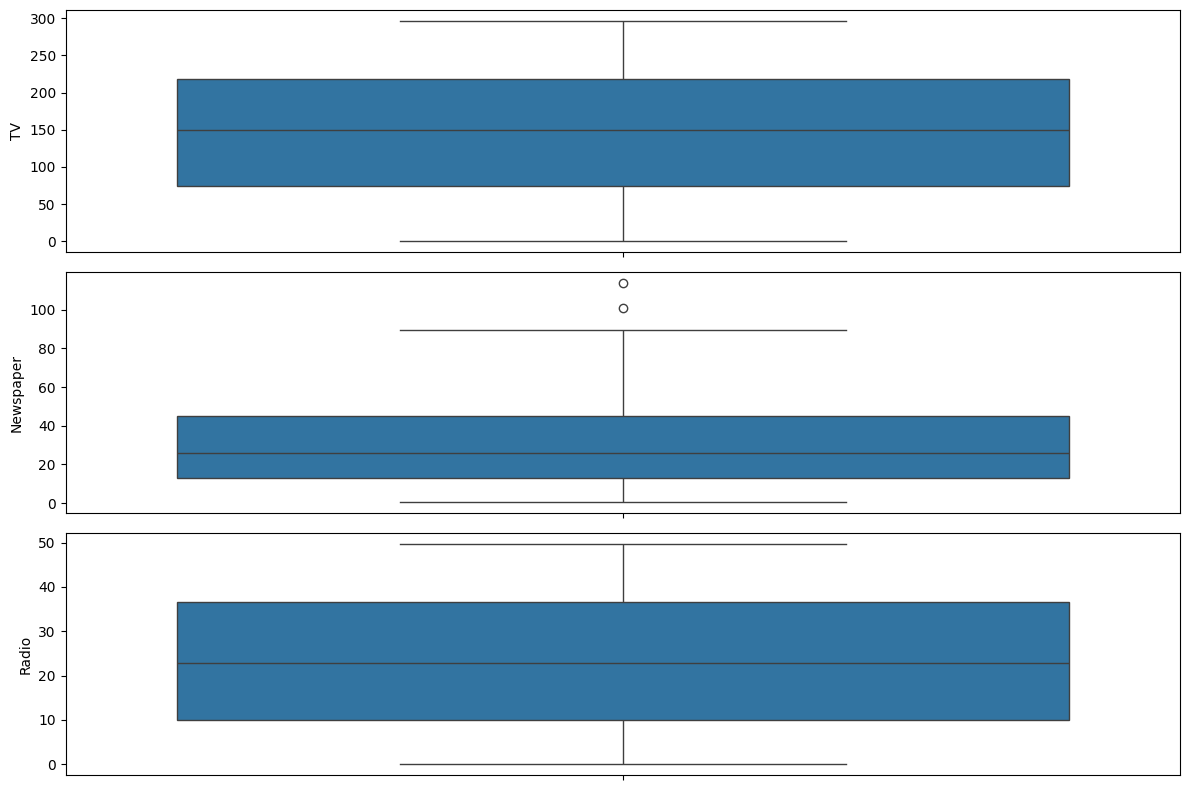

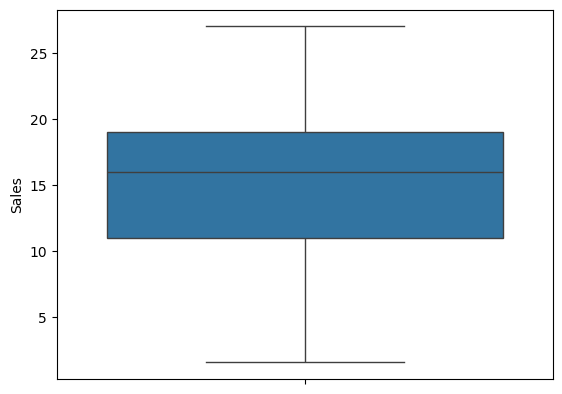

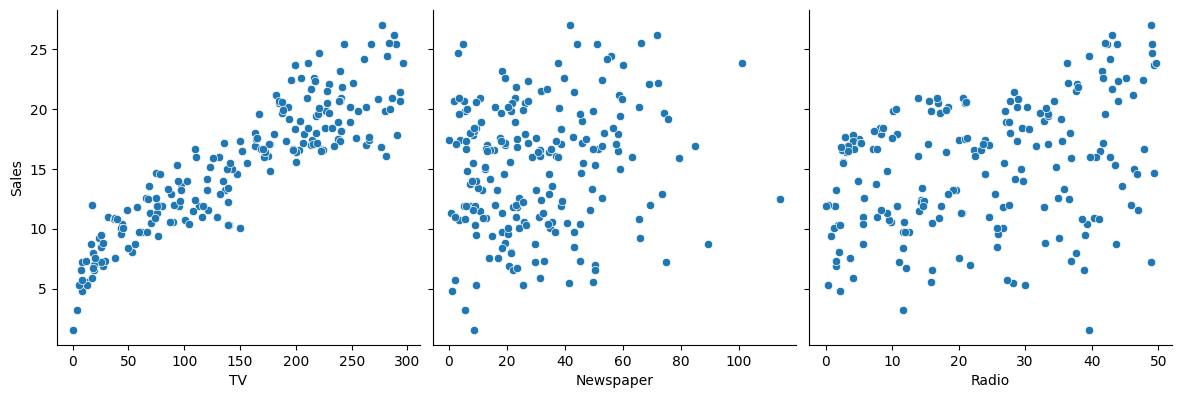

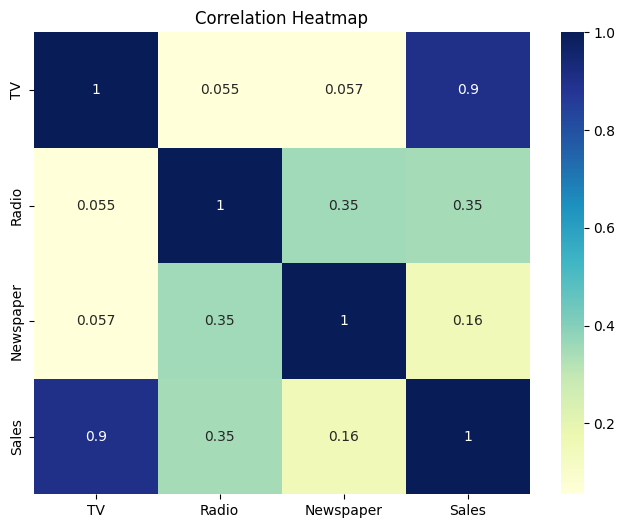

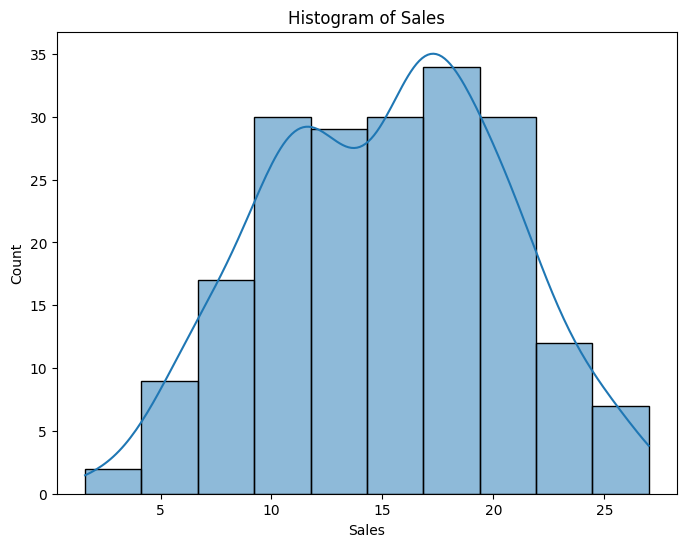

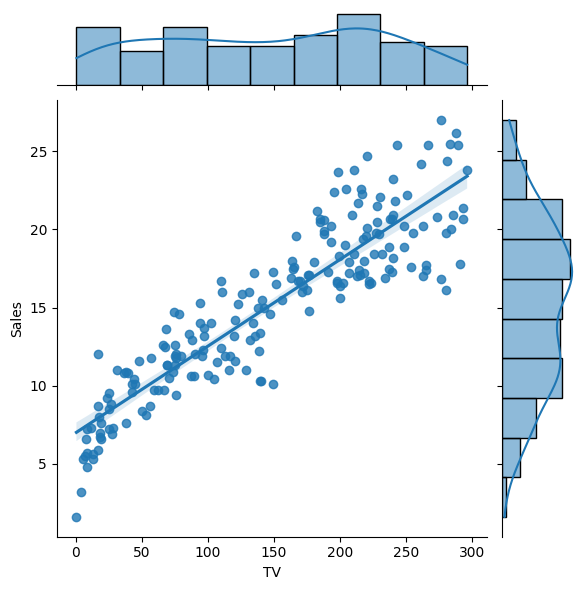

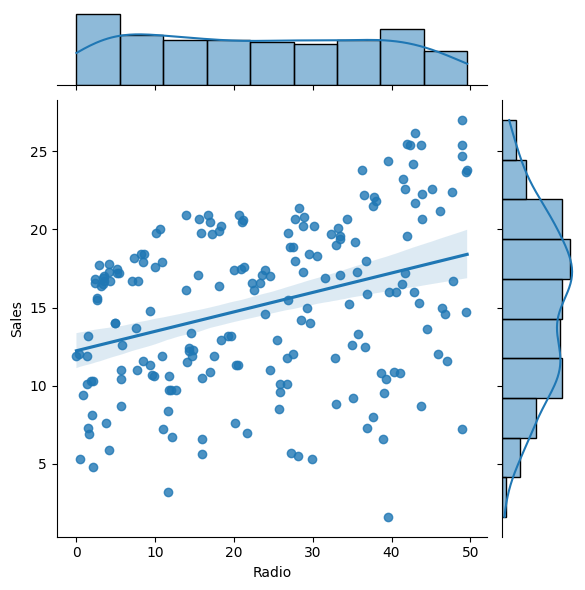

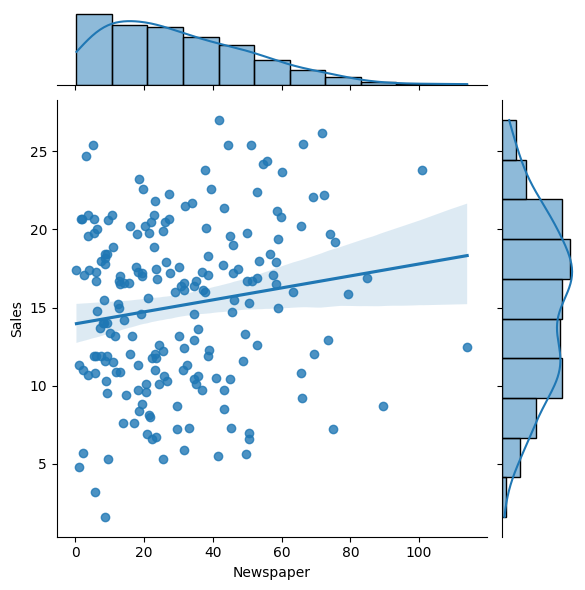

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 26 Jun 2024   Prob (F-statistic):           1.52e-52
Time:                        09:26:09   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

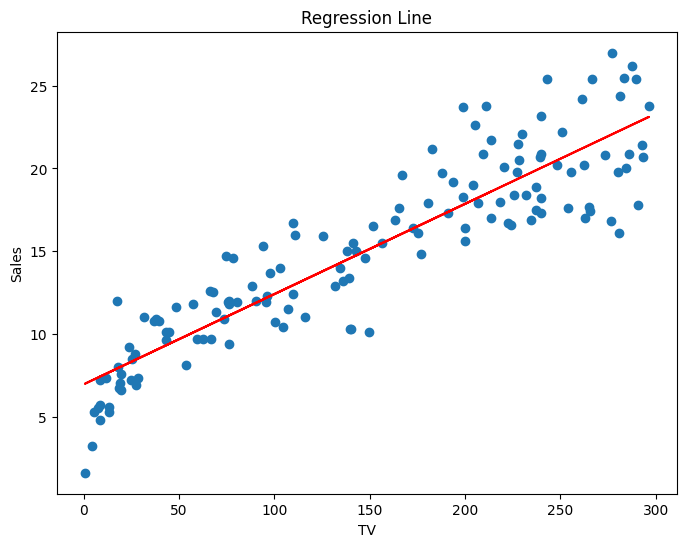

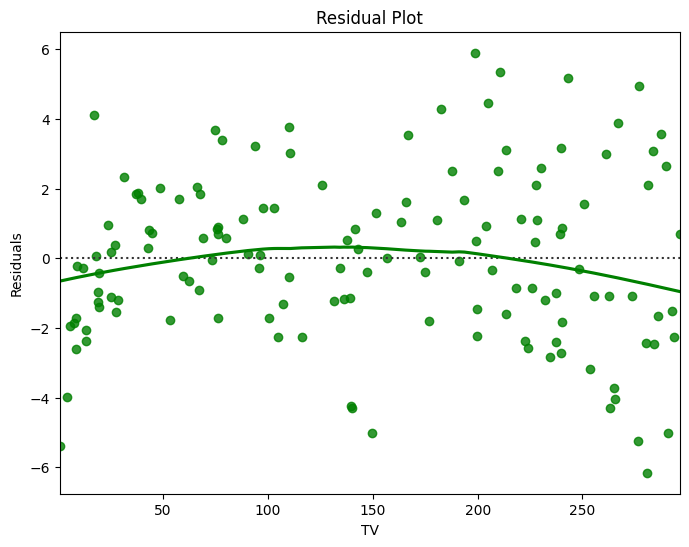

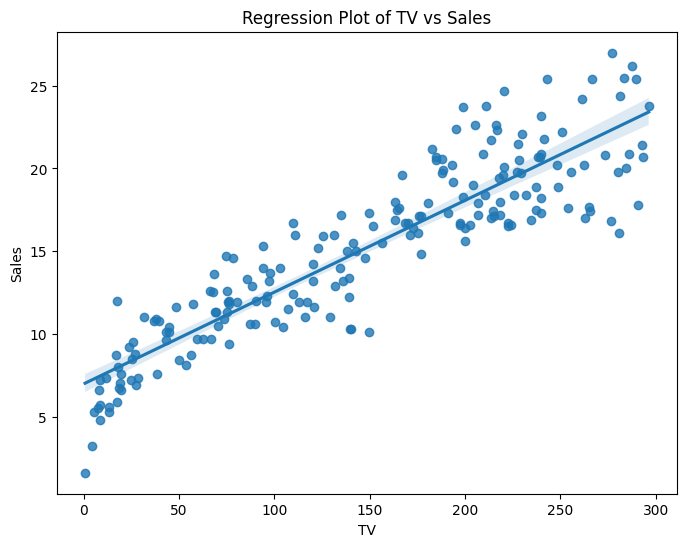

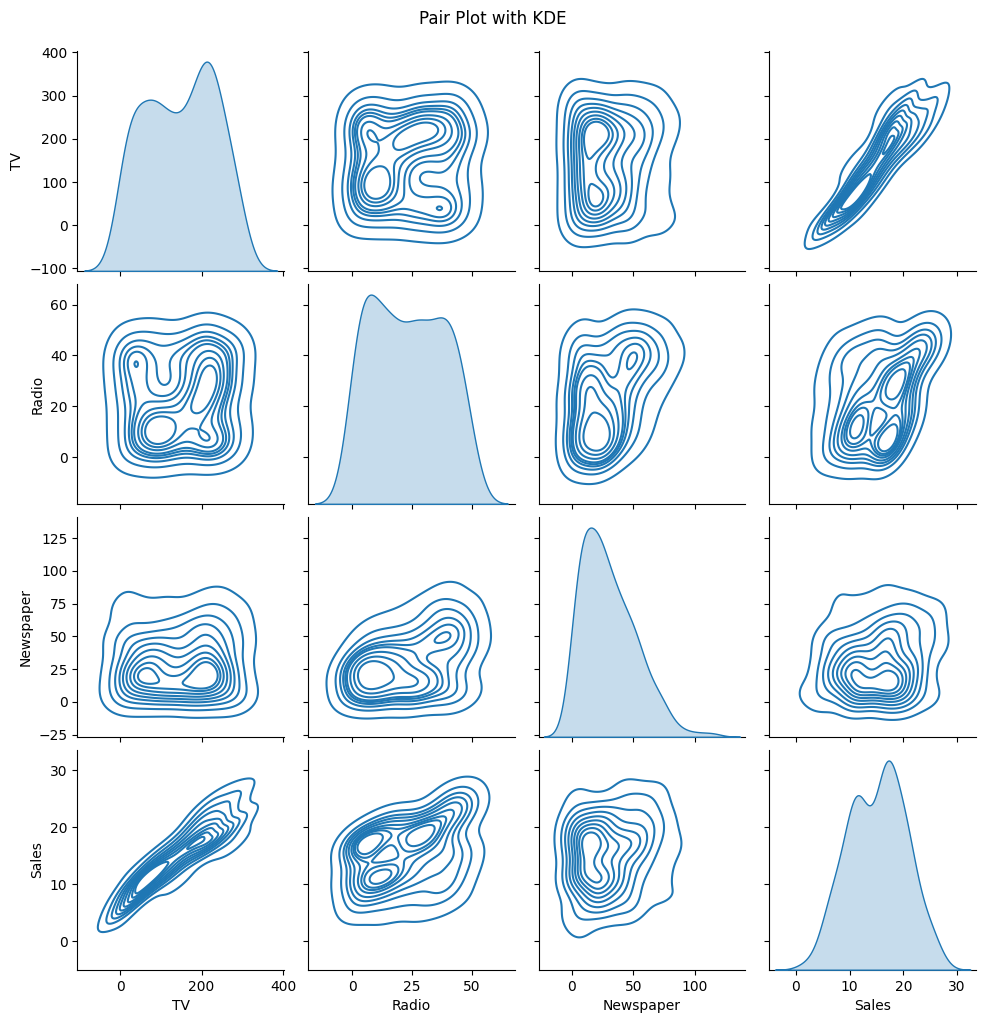

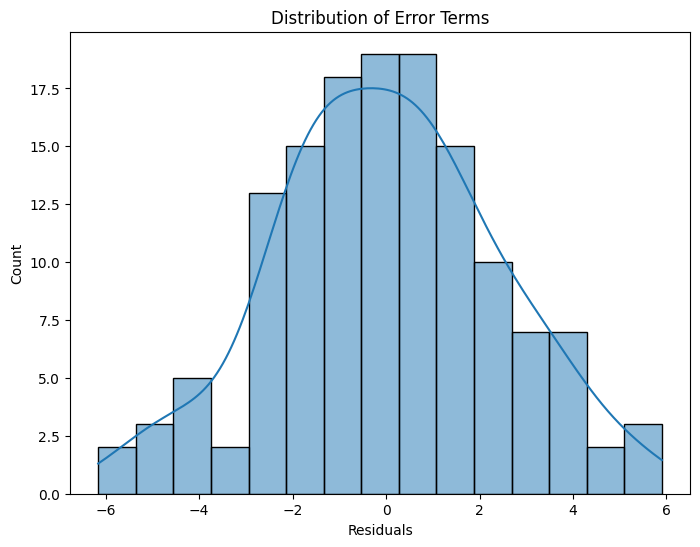

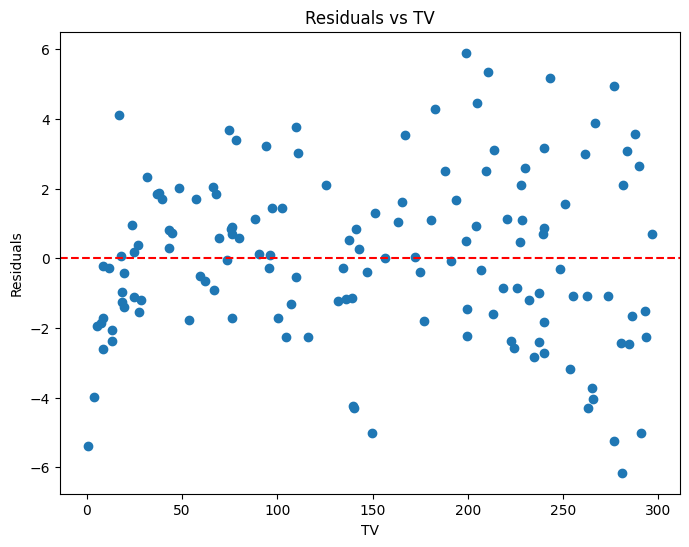

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Load the dataset
advertising = pd.read_csv("/content/advertising (1).csv")

# Display basic information about the dataset
print(advertising.head())
print(advertising.shape)
print(advertising.info())
print(advertising.describe())

# Check for null values
null_percentage = advertising.isnull().sum() * 100 / advertising.shape[0]
print("Null values percentage:\n", null_percentage)

# Outlier Analysis using box plots
fig, axs = plt.subplots(3, figsize=(12, 8))
sns.boxplot(advertising['TV'], ax=axs[0])
sns.boxplot(advertising['Newspaper'], ax=axs[1])
sns.boxplot(advertising['Radio'], ax=axs[2])
plt.tight_layout()
plt.show()

# Box plot for Sales
sns.boxplot(advertising['Sales'])
plt.show()

# Scatter plots to see the relationship between Sales and other variables
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot=True)
plt.title('Correlation Heatmap')
plt.show()

# Additional Visualization 1: Histogram of Sales
plt.figure(figsize=(8, 6))
sns.histplot(advertising['Sales'], kde=True)
plt.title('Histogram of Sales')
plt.show()

# Additional Visualization 2: Joint Plot
sns.jointplot(x='TV', y='Sales', data=advertising, kind='reg')
sns.jointplot(x='Radio', y='Sales', data=advertising, kind='reg')
sns.jointplot(x='Newspaper', y='Sales', data=advertising, kind='reg')
plt.show()

# Prepare data for regression
X = advertising[['TV']]
y = advertising['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Add a constant to the training data
X_train_sm = sm.add_constant(X_train)

# Fit the regression model
lr = sm.OLS(y_train, X_train_sm).fit()
print(lr.summary())

# Plot the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.params[0] + lr.params[1] * X_train, 'r')
plt.title('Regression Line')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

# Predictions on training data
y_train_pred = lr.predict(X_train_sm)
res = y_train - y_train_pred

# Additional Visualization 3: Residual Plot
plt.figure(figsize=(8, 6))
sns.residplot(x=X_train['TV'], y=res, lowess=True, color='g') # Pass X_train['TV'] as x and res as y
plt.title('Residual Plot')
plt.xlabel('TV')
plt.ylabel('Residuals')
plt.show()
# Additional Visualization 4: Regression Plot
plt.figure(figsize=(8, 6))
sns.regplot(x='TV', y='Sales', data=advertising)
plt.title('Regression Plot of TV vs Sales')
plt.show()

# Additional Visualization 5: Pair Plot with KDE
sns.pairplot(advertising, kind='kde')
plt.suptitle('Pair Plot with KDE', y=1.02)
plt.show()

# Distribution of residuals
plt.figure(figsize=(8, 6))
sns.histplot(res, kde=True, bins=15)
plt.title('Distribution of Error Terms')
plt.xlabel('Residuals')
plt.show()

# Scatter plot of residuals
plt.figure(figsize=(8, 6))
plt.scatter(X_train, res)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs TV')
plt.xlabel('TV')
plt.ylabel('Residuals')
plt.show()
